In [ ]:
import pandas as pd
df= pd.read_csv('/content/불법주정차 신고현황(23년11월1일_24년3월13일) (2).csv')
df

,민원접수일,민원접수시간,주소,경도,위도
0,20231101,00:00:00,서울특별시 성동구 사근동길 45,127.045952,37.560972
1,20231101,00:03:00,구로구 가마산로12길 18 앞쪽 고가차도 밑,126.882717,37.492723
2,20231101,00:04:00,공/남부순환로11길 55,126.814655,37.555981
3,20231101,00:07:00,아차산로57길 4 CU구의중앙점 앞,127.088326,37.538708
4,20231101,00:09:00,방학동717-2 [ 도봉로150다길 28] ~ 방학동717-3 주차장 입구 및 전체...,127.044821,37.667286
...,...,...,...,...,...
427360,20240226,19:14:00,마포구 모래내로9길 25(중동 373)앞,126.911702,37.568083
427361,20240226,19:14:00,서울특별시 마포구 창전로 26,126.931488,37.543909
427362,20240226,19:15:00,마포 동교로25길 깐부치킨입구에서 15까지,126.921532,37.557723
427363,20240226,19:15:00,대치동 892/포스코사거리 포스코센터 옆 대로변,127.056510,37.506261


In [ ]:
# 결측치가 있는 행 삭제
df = df.dropna(subset=['주소','위도','경도'])

In [ ]:

# '주소' 컬럼에서 '강남구 신사동'과 일치하는 행 필터링
filtered_df = df[df['주소'].str.contains('대치동|역삼동|신사동')]



# 필터링된 데이터프레임 출력
filtered_df


,민원접수일,민원접수시간,주소,경도,위도
52,20231101,00:49:00,신사동 515-8 / 도산대로11길 11,127.022455,37.518190
53,20231101,00:50:00,신사동 536-6 과 515-8 사이,127.022664,37.518267
79,20231101,01:29:00,역삼동 809-12 대로변 불법주차,127.025713,37.502803
81,20231101,01:30:00,역삼동 815-4 뒷길 주차장입구,127.026855,37.500976
141,20231101,04:01:00,대치동 890-45 이자카야나무 대치점(선릉로86길 37)주소지앞 이면도로 불법주정...,127.052645,37.504118
...,...,...,...,...,...
427268,20240226,19:03:00,대치동 924-6,127.053971,37.498608
427284,20240226,19:03:00,대치동 936-11,127.053569,37.497833
427286,20240226,19:04:00,대치동 920-8,127.052881,37.500374
427287,20240226,19:04:00,역삼동 677-12,127.039453,37.502612


In [ ]:
import folium

# 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 데이터를 이용하여 마커 생성
for index, row in filtered_df.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']],
                        radius=5,  # 마커 크기 조절
                        color='red',  # 빨간색으로 설정
                        fill=True,
                        fill_color='red').add_to(m)

# 지도를 HTML 파일로 저장
m.save('emap.html')


In [ ]:
# 데이터프레임을 CSV 파일로 저장
filtered_df.to_csv('불법주정차_대치신사여러개역삼.csv', index=False)

In [ ]:
filtered_df2=pd.read_csv('/content/불법주정차_대치동신사ㅎㅎ.csv',encoding='cp949')
filtered_df2

,민원접수일,민원접수시간,주소,경도,위도
0,20231101.0,0:49:00,신사동 515-8 / 도산대로11길 11,127.022455,37.518190
1,20231101.0,0:50:00,신사동 536-6 과 515-8 사이,127.022664,37.518267
2,20231101.0,1:29:00,역삼동 809-12 대로변 불법주차,127.025713,37.502803
3,20231101.0,1:30:00,역삼동 815-4 뒷길 주차장입구,127.026855,37.500976
4,20231101.0,4:01:00,대치동 890-45 이자카야나무 대치점(선릉로86길 37)주소지앞 이면도로 불법주정...,127.052645,37.504118
...,...,...,...,...,...
20901,20240226.0,19:03:00,대치동 924-6,127.053971,37.498608
20902,20240226.0,19:03:00,대치동 936-11,127.053569,37.497833
20903,20240226.0,19:04:00,대치동 920-8,127.052881,37.500374
20904,20240226.0,19:04:00,역삼동 677-12,127.039453,37.502612


In [ ]:
# 결측치가 있는 행 삭제
filtered_df2 = filtered_df2.dropna(subset=['주소','위도','경도'])

In [ ]:
filtered_df2 = filtered_df2[~filtered_df2['주소'].str.contains('\(신사동\)')]

In [ ]:
import folium

# 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 데이터를 이용하여 마커 생성
for index, row in filtered_df2.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']],
                        radius=5,  # 마커 크기 조절
                        color='red',  # 빨간색으로 설정
                        fill=True,
                        fill_color='red').add_to(m)

# 지도를 HTML 파일로 저장
m.save('대치_역삼_신사최최종map.html')


In [ ]:
# 데이터프레임을 CSV 파일로 저장
filtered_df2.to_csv('불법주정차_대치동신사ㅎㅎ.csv', index=False)

In [ ]:
filtered_df2 = filtered_df2[~filtered_df2['주소'].str.contains('은평구')]


In [ ]:
filtered_df2 = filtered_df2 [~filtered_df2 ['위도'].astype(str).str.startswith('126.9')]


In [ ]:
import folium

# 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 데이터를 이용하여 마커 생성
for index, row in filtered_df2.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']],
                        radius=5,  # 마커 크기 조절
                        color='red',  # 빨간색으로 설정
                        fill=True,
                        fill_color='red').add_to(m)

# 지도를 HTML 파일로 저장
m.save('대치_역삼_신사최에종map.html')

In [ ]:
df2= pd.read_csv('/content/서울시 강남구 학원 교습소 정보.csv',encoding='cp949')
df2

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시
0,강남구,학원,1000034954,예림서예학원,서울특별시 강남구 선릉로 328,남서울상가 303호 (대치동),기타(대),기타(중),"서예,",서예,...,NaN,N,N,135843,개원,19820420,NaN,99991231.0,19820420,20231018
1,강남구,학원,1000034986,와이비엠어학원,서울특별시 강남구 강남대로 408,", 5~8층 전체, 9층 901호 일부 (역삼동, YBM강남센터)",종합(대),NaN,어학(성인),NaN,...,NaN,Y,N,6134,개원,19830827,NaN,99991231.0,19830827,20240225
2,강남구,학원,1000034990,신세계음악학원,서울특별시 강남구 삼성로 212,", B동 205호 (대치동, 은마아파트)",예능(대),예능(중),"음악,",음악,...,NaN,Y,N,6284,개원,19830224,NaN,99991231.0,19830224,20231018
3,강남구,학원,1000035036,압구정뮤직아카데미학원,서울특별시 강남구 언주로172길 12,", 3층전체 (신사동)",예능(대),예능(중),NaN,음악,...,NaN,Y,N,6017,개원,19840828,NaN,99991231.0,19840828,20231018
4,강남구,학원,1000035039,심포니음악학원,서울특별시 강남구 학동로 513,", 3층 2호 (청담동)",예능(대),예능(중),"음악,",음악,...,NaN,Y,N,6074,개원,19840730,NaN,99991231.0,19840730,20231018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,강남구,교습소,9521,김형은수학교습소,서울특별시 강남구 선릉로 227,진달래아파트상가 406호(도곡동),입시.검정 및 보습,보통교과,수학,보습,...,수학:0,N,N,135779,개원,20050419,NaN,99991231.0,20050419,20231018
3643,강남구,교습소,9526,대치지아이(Daechi GI)영어교습소,서울특별시 강남구 삼성로 212,은마편의시설 305호 (대치동),입시.검정 및 보습,보통교과,영어,보습,...,"영어:360000, 영어:320000, 영어:280000, 영어:240000, 영어...",N,N,135835,개원,20050421,NaN,99991231.0,20050421,20231029
3644,강남구,교습소,9738,소리샘피아노교습소,서울특별시 강남구 광평로10길 15,상록수A단지상가 102호 (일원동),예능(대),예능(중),NaN,음악,...,"주5회(초급피아노):170000, 주2회(중급피아노):140000, 주3회(초급피아...",N,N,135947,개원,20050504,NaN,99991231.0,20050504,20231018
3645,강남구,학원,9838,예섬프론티어학원,서울특별시 강남구 도곡로 430,", 1층, 2층 (대치동)",입시.검정 및 보습,NaN,"보습?논술,",NaN,...,NaN,Y,N,6279,개원,20050520,NaN,99991231.0,20050520,20231018


In [ ]:
import folium
from geopy.geocoders import Nominatim
import pandas as pd

In [ ]:
df3=pd.read_csv('/content/서울특별시_신호등표준데이터_20230403.csv',encoding='cp949')
df3

,순번,시도명,시군구명,도로종류,주소,X좌표,Y좌표,부착형태,관리번호,신호등종류,광원종류,음향신호기 유무,잔여시간 유무,보행자작동신호기 유무
0,1,서울특별시,강남구,구도,서울특별시 강남구 역삼동 111-114 도,204221.1482,544841.5551,측주식횡형,03-0000064550,측주식횡형경보(2),LED,X,X,X
1,2,서울특별시,강남구,구도,서울특별시 강남구 역삼동 802-31 도,204212.9296,544827.9974,측주식횡형,03-0000064549,측주식횡형경보(2),LED,X,X,X
2,3,서울특별시,강남구,구도,서울특별시 강남구 역삼동 802-31 도,204212.9296,544827.9974,측주식횡형,03-0000064551,측주식횡형경보(2),LED,X,X,X
3,4,서울특별시,강남구,시도,서울특별시 강남구 대치동 973-12 대,205374.9878,544360.3235,측주식종형,03-0000013905,보행등,LED,O,O,X
4,5,서울특별시,강남구,시도,서울특별시 강남구 대치동 973-12 대,205374.9878,544360.3235,측주식횡형,03-0000064354,4색등,LED,O,O,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134051,134052,서울특별시,중랑구,구도,서울특별시 중랑구 중화동 305-61대,206910.4250,555522.6187,측주식횡형,03-0000043365,3색등,전구,X,O,X
134052,134053,서울특별시,중랑구,시도,서울특별시 중랑구 중화동 188-1대,206976.4000,555973.1562,측주식횡형,03-0000031412,3색등,LED,X,X,X
134053,134054,서울특별시,중랑구,시도,서울특별시 중랑구 중화동 188-1대,206971.6625,556007.3437,측주식종형,03-0000023605,보행등,LED,X,O,X
134054,134055,서울특별시,중랑구,시도,서울특별시 중랑구 중화동 187-29 대,206997.0000,556011.3312,측주식횡형,03-0000023510,3색등,LED,X,O,X


In [ ]:
# 결측치가 있는 행 삭제
df3 = df3.dropna(subset=['신호등종류'])

# '대치동'이 포함된 행만 필터링
filtered_df3 = df3[df3['신호등종류'].str.contains('보행등')]


In [ ]:
filtered_df3 = filtered_df3[filtered_df3['시군구명'] == '강남구']



In [ ]:
filtered_df4 = filtered_df3[filtered_df3['주소'].str.contains('대치동|역삼동|신사동')]


In [ ]:
filtered_df3

,순번,시도명,시군구명,도로종류,주소,X좌표,Y좌표,부착형태,관리번호,신호등종류,광원종류,음향신호기 유무,잔여시간 유무,보행자작동신호기 유무
3,4,서울특별시,강남구,시도,서울특별시 강남구 대치동 973-12 대,205374.9878,544360.3235,측주식종형,03-0000013905,보행등,LED,O,O,X
5,6,서울특별시,강남구,시도,서울특별시 강남구 대치동 973-12 대,205374.9878,544360.3235,측주식종형,03-0000013905,보행등,전구,O,O,X
7,8,서울특별시,강남구,시도,서울특별시 강남구 역삼동 712 공,203974.3625,544362.8187,측주식종형,03-0000064343,보행등,LED,O,O,O
8,9,서울특별시,강남구,시도,서울특별시 강남구 역삼동 633-16 대,202722.1824,544404.9315,측주식종형,03-0000065097,보행등,LED,O,X,X
10,11,서울특별시,강남구,시도,서울특별시 강남구 삼성동 186-6천,205839.8146,546182.1334,측주식종형,03-0000014413,보행등,LED,O,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7432,7433,서울특별시,강남구,시도,서울특별시 강남구 일원동 12 대,206713.4529,543684.0850,측주식종형,03-0000014467,보행등,LED,O,O,X
7434,7435,서울특별시,강남구,시도,서울특별시 강남구 일원동 12 대,206713.4529,543684.0850,측주식종형,03-0000014467,보행등,LED,O,O,X
7436,7437,서울특별시,강남구,시도,서울특별시 강남구 일원동 12 대,206713.4529,543684.0850,측주식종형,03-0000014467,보행등,전구,O,O,X
7437,7438,서울특별시,강남구,시도,서울특별시 강남구 역삼동 175-27 대,202771.7875,545219.2062,측주식종형,03-0000083847,보행등,LED,O,X,X


In [ ]:
filtered_df4

,순번,시도명,시군구명,도로종류,주소,X좌표,Y좌표,부착형태,관리번호,신호등종류,광원종류,음향신호기 유무,잔여시간 유무,보행자작동신호기 유무
3,4,서울특별시,강남구,시도,서울특별시 강남구 대치동 973-12 대,205374.9878,544360.3235,측주식종형,03-0000013905,보행등,LED,O,O,X
5,6,서울특별시,강남구,시도,서울특별시 강남구 대치동 973-12 대,205374.9878,544360.3235,측주식종형,03-0000013905,보행등,전구,O,O,X
7,8,서울특별시,강남구,시도,서울특별시 강남구 역삼동 712 공,203974.3625,544362.8187,측주식종형,03-0000064343,보행등,LED,O,O,O
8,9,서울특별시,강남구,시도,서울특별시 강남구 역삼동 633-16 대,202722.1824,544404.9315,측주식종형,03-0000065097,보행등,LED,O,X,X
21,22,서울특별시,강남구,시도,서울특별시 강남구 대치동 137 공,204381.3919,545002.0500,측주식종형,03-0000066130,보행등,LED,X,O,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7377,7378,서울특별시,강남구,시도,서울특별시 강남구 역삼동 858 도,202721.2500,543562.1562,측주식횡형,03-0000042629,보행등,전구,O,X,X
7378,7379,서울특별시,강남구,시도,서울특별시 강남구 역삼동 858 도,202721.2500,543562.1562,측주식횡형,03-0000042630,보행등,전구,O,X,X
7380,7381,서울특별시,강남구,시도,서울특별시 강남구 역삼동 858 도,202721.2500,543562.1562,측주식횡형,03-0000042629,보행등,LED,O,X,X
7381,7382,서울특별시,강남구,시도,서울특별시 강남구 역삼동 858 도,202721.2500,543562.1562,측주식횡형,03-0000042630,보행등,LED,O,X,X


In [ ]:
# 데이터프레임을 CSV 파일로 저장
filtered_df4.to_csv('신호등보행자.csv', index=False)

In [ ]:
import folium

# 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

# 데이터를 이용하여 마커 생성
for index, row in filtered_df4.iterrows():
    if not pd.isnull(row['X좌표']) and not pd.isnull(row['Y좌표']):
        folium.Marker(location=[row['Y좌표'], row['X좌표']],
                      popup=f"{row['도로종류']} {row['주소']}").add_to(m)

# 지도를 HTML 파일로 저장
m.save('signal_lights_map.html')


In [ ]:
import pandas as pd
school_info= pd.read_csv('/content/school_info.csv',encoding='cp949')
school_info

,시도교육청코드,시도교육청명,표준학교코드,학교명,영문학교명,학교종류명,소재지명,관할조직명,설립명,도로명우편번호,...,팩스번호,고등학교구분명,산업체특별학급존재여부,고등학교일반실업구분명,특수목적고등학교계열명,입시전후기구분명,주야구분명,설립일자,개교기념일,수정일
0,B10,서울특별시교육청,7010057,가락고등학교,Garak High School,고등학교,서울특별시,서울특별시교육청,공립,5678,...,02-421-9669,일반고,N,일반계,NaN,후기,주간,19881223,19890428,20230205
1,B10,서울특별시교육청,7130165,가락중학교,Karak Middle School,중학교,서울특별시,서울특별시강동송파교육지원청,공립,5673,...,02-2143-3119,NaN,N,일반계,NaN,전기,주간,19860129,19860506,20230205
2,B10,서울특별시교육청,7041164,가산중학교,Gasan Middle School,중학교,서울특별시,서울특별시남부교육지원청,공립,8584,...,02-892-8477,NaN,N,일반계,NaN,전기,주간,19700810,19710303,20230205
3,B10,서울특별시교육청,7130166,가원중학교,Gawon Middle School,중학교,서울특별시,서울특별시강동송파교육지원청,공립,5831,...,02-443-5825,NaN,N,일반계,NaN,전기,주간,19881224,19881224,20230205
4,B10,서울특별시교육청,7011169,가재울고등학교,Gajaeul High School,고등학교,서울특별시,서울특별시교육청,공립,3709,...,02-307-6605,일반고,N,일반계,NaN,후기,주간,20130301,20130501,20230205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12550,T10,제주특별자치도교육청,9296176,해안초등학교,Haean Elementary School,초등학교,제주특별자치도,제주시교육지원청,공립,63077,...,064-797-8499,NaN,N,해당없음,NaN,전기,주간,19610401,19610401,20230205
12551,T10,제주특별자치도교육청,9296050,화북초등학교,HWABUK ELEMENTARY SCHOOL,초등학교,제주특별자치도,제주시교육지원청,공립,63293,...,064-720-7599,NaN,N,일반계,NaN,전기,주간,19260715,19260715,20230205
12552,T10,제주특별자치도교육청,9299012,효돈중학교,HYODON MIDDLE SCHOOL,중학교,제주특별자치도,서귀포시교육지원청,공립,63606,...,064-730-0290,NaN,N,일반계,NaN,전기,주간,19510820,19550515,20230205
12553,T10,제주특별자치도교육청,9299031,효돈초등학교,HYODON ELEMENTARY SCHOOL,초등학교,제주특별자치도,서귀포시교육지원청,공립,63606,...,064-767-1794,NaN,N,일반계,NaN,전기,주간,19380520,19380520,20230205


In [ ]:
# 결측치가 있는 행 삭제
school_info = school_info.dropna(subset=['도로명주소'])

# '대치동'이 포함된 행만 필터링
school_info_df = school_info[school_info['도로명주소'].str.contains('강남구')]
school_info_df

,시도교육청코드,시도교육청명,표준학교코드,학교명,영문학교명,학교종류명,소재지명,관할조직명,설립명,도로명우편번호,...,팩스번호,고등학교구분명,산업체특별학급존재여부,고등학교일반실업구분명,특수목적고등학교계열명,입시전후기구분명,주야구분명,설립일자,개교기념일,수정일
21,B10,서울특별시교육청,7091420,개원중학교,Gaewon Middle School,중학교,서울특별시,서울특별시강남서초교육지원청,공립,6328,...,02-3411-8329,NaN,N,일반계,NaN,전기,주간,19841204,19841204,20230205
22,B10,서울특별시교육청,7010058,개포고등학교,Gaepo High School,고등학교,서울특별시,서울특별시교육청,공립,6324,...,02-571-6560,일반고,N,일반계,NaN,후기,주간,19870512,19870512,20230205
23,B10,서울특별시교육청,7091421,개포중학교,Gaepo Middle School,중학교,서울특별시,서울특별시강남서초교육지원청,공립,6321,...,02-578-3823,NaN,N,일반계,NaN,전기,주간,19821209,19830422,20230205
27,B10,서울특별시교육청,7010059,경기고등학교,Kyunggi High School,고등학교,서울특별시,서울특별시교육청,공립,6086,...,02-3496-7497,일반고,N,일반계,NaN,후기,주간,19001003,19001003,20230205
31,B10,서울특별시교육청,7010060,경기여자고등학교,Kyunggi Girls’High School,고등학교,서울특별시,서울특별시교육청,공립,6324,...,02-575-1157,일반고,N,일반계,NaN,후기,주간,19080401,19080401,20230205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,B10,서울특별시교육청,7011457,풍문고등학교,Poongmoon High School,고등학교,서울특별시,서울특별시교육청,사립,6373,...,02-732-4536,일반고,N,일반계,NaN,후기,주간,19440410,19440410,20230205
1360,B10,서울특별시교육청,7010847,한국외국인학교,Korea International Shcool,외국인학교,서울특별시,서울특별시교육청,사립,6324,...,02-578-6680,NaN,N,해당없음,NaN,전기,주간,19990801,19990801,20230205
1392,B10,서울특별시교육청,7010260,현대고등학교,Hyundai Senior High School,고등학교,서울특별시,서울특별시교육청,사립,6000,...,02-514-3106,자율고,N,일반계,NaN,전기,주간,19841217,19850429,20230205
1418,B10,서울특별시교육청,7010268,휘문고등학교,Whimoon High School,고등학교,서울특별시,서울특별시교육청,사립,6183,...,02-568-7079,자율고,N,일반계,NaN,전기,주간,19060501,19060501,20230205


In [ ]:
academy_info= pd.read_csv('/content/seoul_academy_info.csv',encoding='cp949')
academy_info

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시
0,강남구,학원,1000034954,예림서예학원,서울특별시 강남구 선릉로 328,남서울상가 303호 (대치동),기타(대),기타(중),"서예,",서예,...,NaN,N,N,135843,개원,19820420,NaN,99991231.0,19820420,20231018
1,강남구,학원,1000034986,와이비엠어학원,서울특별시 강남구 강남대로 408,", 5~8층 전체, 9층 901호 일부 (역삼동, YBM강남센터)",종합(대),NaN,어학(성인),NaN,...,NaN,Y,N,6134,개원,19830827,NaN,99991231.0,19830827,20240225
2,강남구,학원,1000034990,신세계음악학원,서울특별시 강남구 삼성로 212,", B동 205호 (대치동, 은마아파트)",예능(대),예능(중),"음악,",음악,...,NaN,Y,N,6284,개원,19830224,NaN,99991231.0,19830224,20231018
3,강남구,학원,1000035036,압구정뮤직아카데미학원,서울특별시 강남구 언주로172길 12,", 3층전체 (신사동)",예능(대),예능(중),NaN,음악,...,NaN,Y,N,6017,개원,19840828,NaN,99991231.0,19840828,20231018
4,강남구,학원,1000035039,심포니음악학원,서울특별시 강남구 학동로 513,", 3층 2호 (청담동)",예능(대),예능(중),"음악,",음악,...,NaN,Y,N,6074,개원,19840730,NaN,99991231.0,19840730,20231018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,강남구,교습소,9521,김형은수학교습소,서울특별시 강남구 선릉로 227,진달래아파트상가 406호(도곡동),입시.검정 및 보습,보통교과,수학,보습,...,수학:0,N,N,135779,개원,20050419,NaN,99991231.0,20050419,20231018
3643,강남구,교습소,9526,대치지아이(Daechi GI)영어교습소,서울특별시 강남구 삼성로 212,은마편의시설 305호 (대치동),입시.검정 및 보습,보통교과,영어,보습,...,"영어:360000, 영어:320000, 영어:280000, 영어:240000, 영어...",N,N,135835,개원,20050421,NaN,99991231.0,20050421,20231029
3644,강남구,교습소,9738,소리샘피아노교습소,서울특별시 강남구 광평로10길 15,상록수A단지상가 102호 (일원동),예능(대),예능(중),NaN,음악,...,"주5회(초급피아노):170000, 주2회(중급피아노):140000, 주3회(초급피아...",N,N,135947,개원,20050504,NaN,99991231.0,20050504,20231018
3645,강남구,학원,9838,예섬프론티어학원,서울특별시 강남구 도곡로 430,", 1층, 2층 (대치동)",입시.검정 및 보습,NaN,"보습?논술,",NaN,...,NaN,Y,N,6279,개원,20050520,NaN,99991231.0,20050520,20231018


In [ ]:
# 결측치가 있는 행 삭제
academy_info = academy_info.dropna(subset=['도로명주소'])

# '대치동'이 포함된 행만 필터링
academy_info_df = academy_info[academy_info['도로명주소'].str.contains('강남구')]
academy_info_df

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시
0,강남구,학원,1000034954,예림서예학원,서울특별시 강남구 선릉로 328,남서울상가 303호 (대치동),기타(대),기타(중),"서예,",서예,...,NaN,N,N,135843,개원,19820420,NaN,99991231.0,19820420,20231018
1,강남구,학원,1000034986,와이비엠어학원,서울특별시 강남구 강남대로 408,", 5~8층 전체, 9층 901호 일부 (역삼동, YBM강남센터)",종합(대),NaN,어학(성인),NaN,...,NaN,Y,N,6134,개원,19830827,NaN,99991231.0,19830827,20240225
2,강남구,학원,1000034990,신세계음악학원,서울특별시 강남구 삼성로 212,", B동 205호 (대치동, 은마아파트)",예능(대),예능(중),"음악,",음악,...,NaN,Y,N,6284,개원,19830224,NaN,99991231.0,19830224,20231018
3,강남구,학원,1000035036,압구정뮤직아카데미학원,서울특별시 강남구 언주로172길 12,", 3층전체 (신사동)",예능(대),예능(중),NaN,음악,...,NaN,Y,N,6017,개원,19840828,NaN,99991231.0,19840828,20231018
4,강남구,학원,1000035039,심포니음악학원,서울특별시 강남구 학동로 513,", 3층 2호 (청담동)",예능(대),예능(중),"음악,",음악,...,NaN,Y,N,6074,개원,19840730,NaN,99991231.0,19840730,20231018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,강남구,교습소,9521,김형은수학교습소,서울특별시 강남구 선릉로 227,진달래아파트상가 406호(도곡동),입시.검정 및 보습,보통교과,수학,보습,...,수학:0,N,N,135779,개원,20050419,NaN,99991231.0,20050419,20231018
3643,강남구,교습소,9526,대치지아이(Daechi GI)영어교습소,서울특별시 강남구 삼성로 212,은마편의시설 305호 (대치동),입시.검정 및 보습,보통교과,영어,보습,...,"영어:360000, 영어:320000, 영어:280000, 영어:240000, 영어...",N,N,135835,개원,20050421,NaN,99991231.0,20050421,20231029
3644,강남구,교습소,9738,소리샘피아노교습소,서울특별시 강남구 광평로10길 15,상록수A단지상가 102호 (일원동),예능(대),예능(중),NaN,음악,...,"주5회(초급피아노):170000, 주2회(중급피아노):140000, 주3회(초급피아...",N,N,135947,개원,20050504,NaN,99991231.0,20050504,20231018
3645,강남구,학원,9838,예섬프론티어학원,서울특별시 강남구 도곡로 430,", 1층, 2층 (대치동)",입시.검정 및 보습,NaN,"보습?논술,",NaN,...,NaN,Y,N,6279,개원,20050520,NaN,99991231.0,20050520,20231018


In [ ]:
import pandas as pd
re= pd.read_csv('/content/서울시 강남구 일반음식점 인허가 정보.csv',encoding='cp949')
re

<ipython-input-28-079088363b46>:2: DtypeWarning: Columns (46,48,56,57,59,60,61,62,63,66,69,70,71,80) have mixed types. Specify dtype option on import or set low_memory=False.
  re= pd.read_csv('/content/서울시 강남구 일반음식점 인허가 정보.csv',encoding='cp949')


,개방자치단체코드,관리번호,인허가일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지면적,소재지우편번호,...,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81
0,3220000,3220000-101-1007-00001,19970205,1,영업/정상,1,영업,NaN,NaN,135954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3220000,3220000-101-1899-05119,19960829,3,폐업,2,폐업,19991014,23.29,135994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3220000,3220000-101-1899-14279,19960201,3,폐업,2,폐업,19991005,94.38,135888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3220000,3220000-101-1899-15993,19930614,3,폐업,2,폐업,19991004,73.43,135717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3220000,3220000-101-1899-16683,19921002,3,폐업,2,폐업,19991009,212.94,135821,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47590,3220000,3220000-101-2024-00433,2024-04-09,1,영업/정상,1,영업,NaN,90.21,135-931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47591,3220000,3220000-101-2024-00434,2024-04-09,1,영업/정상,1,영업,NaN,90,135-731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47592,3220000,3220000-101-2024-00435,2024-04-09,1,영업/정상,1,영업,NaN,28.29,135-891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47593,3220000,3220000-101-2124-12753,19941228,3,폐업,2,폐업,20100226,29.93,135240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
re = re[re['영업상태명'] != '폐업']
re

,개방자치단체코드,관리번호,인허가일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지면적,소재지우편번호,...,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81
0,3220000,3220000-101-1007-00001,19970205,1,영업/정상,1,영업,NaN,NaN,135954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3220000,3220000-101-1899-20451,19991005,1,영업/정상,1,영업,NaN,950.66,135090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3220000,3220000-101-1899-20453,19991005,1,영업/정상,1,영업,NaN,473.24,135090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,3220000,3220000-101-1899-20463,19991006,1,영업/정상,1,영업,NaN,282.59,135090,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,3220000,3220000-101-1899-20500,19991012,1,영업/정상,1,영업,NaN,"1,157.90",135873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47588,3220000,3220000-101-2024-00431,2024-04-08,1,영업/정상,1,영업,NaN,226.48,135-897,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47589,3220000,3220000-101-2024-00432,2024-04-09,1,영업/정상,1,영업,NaN,31.59,135-832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47590,3220000,3220000-101-2024-00433,2024-04-09,1,영업/정상,1,영업,NaN,90.21,135-931,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47591,3220000,3220000-101-2024-00434,2024-04-09,1,영업/정상,1,영업,NaN,90,135-731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
re = re.dropna(axis=1, how='all')
re

,개방자치단체코드,관리번호,인허가일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,소재지면적,소재지우편번호,지번주소,...,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,시설총규모
0,3220000,3220000-101-1007-00001,19970205,1,영업/정상,1,영업,NaN,135954,서울특별시 강남구 청담동 88-5번지,...,한식,203520.8811,446950.2856,한식,NaN,NaN,NaN,NaN,NaN,0.00
7,3220000,3220000-101-1899-20451,19991005,1,영업/정상,1,영업,950.66,135090,서울특별시 강남구 삼성동 159,...,경양식,205130.5917,445590.0968,경양식,0.0,0.0,기타,기타,상수도전용,950.66
8,3220000,3220000-101-1899-20453,19991005,1,영업/정상,1,영업,473.24,135090,서울특별시 강남구 삼성동 159,...,경양식,205130.5917,445590.0968,경양식,0.0,0.0,기타,자율,상수도전용,473.24
10,3220000,3220000-101-1899-20463,19991006,1,영업/정상,1,영업,282.59,135090,서울특별시 강남구 삼성동 159,...,경양식,205130.5917,445590.0968,경양식,0.0,0.0,기타,자율,상수도전용,282.59
15,3220000,3220000-101-1899-20500,19991012,1,영업/정상,1,영업,"1,157.90",135873,서울특별시 강남구 삼성동 109-6,...,한식,205662.8739,445913.7198,한식,0.0,0.0,결혼예식장주변,자율,상수도전용,1157.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47588,3220000,3220000-101-2024-00431,2024-04-08,1,영업/정상,1,영업,226.48,135-897,서울특별시 강남구 신사동 662-6,...,경양식,203324.8155,447194.8937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47589,3220000,3220000-101-2024-00432,2024-04-09,1,영업/정상,1,영업,31.59,135-832,서울특별시 강남구 논현동 253-11 ZOAZOA빌딩,...,기타,203508.5158,445785.8122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47590,3220000,3220000-101-2024-00433,2024-04-09,1,영업/정상,1,영업,90.21,135-931,서울특별시 강남구 역삼동 817-14 JWHouse,...,한식,202386.5553,444219.7213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47591,3220000,3220000-101-2024-00434,2024-04-09,1,영업/정상,1,영업,90,135-731,서울특별시 강남구 삼성동 159 코엑스,...,기타,205130.5917,445590.0968,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
re = re.dropna(subset=['좌표정보(X)'])
re

,개방자치단체코드,관리번호,인허가일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,소재지면적,소재지우편번호,지번주소,...,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,시설총규모
0,3220000,3220000-101-1007-00001,19970205,1,영업/정상,1,영업,NaN,135954,서울특별시 강남구 청담동 88-5번지,...,한식,203520.8811,446950.2856,한식,NaN,NaN,NaN,NaN,NaN,0.00
7,3220000,3220000-101-1899-20451,19991005,1,영업/정상,1,영업,950.66,135090,서울특별시 강남구 삼성동 159,...,경양식,205130.5917,445590.0968,경양식,0.0,0.0,기타,기타,상수도전용,950.66
8,3220000,3220000-101-1899-20453,19991005,1,영업/정상,1,영업,473.24,135090,서울특별시 강남구 삼성동 159,...,경양식,205130.5917,445590.0968,경양식,0.0,0.0,기타,자율,상수도전용,473.24
10,3220000,3220000-101-1899-20463,19991006,1,영업/정상,1,영업,282.59,135090,서울특별시 강남구 삼성동 159,...,경양식,205130.5917,445590.0968,경양식,0.0,0.0,기타,자율,상수도전용,282.59
15,3220000,3220000-101-1899-20500,19991012,1,영업/정상,1,영업,"1,157.90",135873,서울특별시 강남구 삼성동 109-6,...,한식,205662.8739,445913.7198,한식,0.0,0.0,결혼예식장주변,자율,상수도전용,1157.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47588,3220000,3220000-101-2024-00431,2024-04-08,1,영업/정상,1,영업,226.48,135-897,서울특별시 강남구 신사동 662-6,...,경양식,203324.8155,447194.8937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47589,3220000,3220000-101-2024-00432,2024-04-09,1,영업/정상,1,영업,31.59,135-832,서울특별시 강남구 논현동 253-11 ZOAZOA빌딩,...,기타,203508.5158,445785.8122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47590,3220000,3220000-101-2024-00433,2024-04-09,1,영업/정상,1,영업,90.21,135-931,서울특별시 강남구 역삼동 817-14 JWHouse,...,한식,202386.5553,444219.7213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47591,3220000,3220000-101-2024-00434,2024-04-09,1,영업/정상,1,영업,90,135-731,서울특별시 강남구 삼성동 159 코엑스,...,기타,205130.5917,445590.0968,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 데이터프레임을 CSV 파일로 저장
re.to_csv('식당.csv', index=False)

In [ ]:
re1=pd.read_csv('/content/식당.csv')
re1

,개방자치단체코드,관리번호,인허가일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,소재지면적,소재지우편번호,지번주소,...,업태구분명,좌표정보(X),좌표정보(Y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,시설총규모
0,3220000,3220000-101-1976-17996,19761223,1,영업/정상,1,영업,50.24,135887,서울특별시 강남구 신사동 502-11번지,...,한식,201684.7048,446105.8590,한식,0.0,3.0,주택가주변,갑,상수도전용,50.24
1,3220000,3220000-101-1978-12840,19781006,1,영업/정상,1,영업,39.54,135842,서울특별시 강남구 대치동 974-1번지,...,중국식,205247.2803,444294.5912,중국식,2.0,1.0,아파트지역,갑,상수도전용,39.54
2,3220000,3220000-101-1978-16489,19781017,1,영업/정상,1,영업,49.24,135915,서울특별시 강남구 역삼동 678-11번지,...,한식,203297.4913,444452.2959,한식,3.0,2.0,유흥업소밀집지역,자율,상수도전용,49.24
3,3220000,3220000-101-1978-17610,19781215,1,영업/정상,1,영업,34.7,135997,서울특별시 강남구 대치동 912-23 우진빌딩,...,한식,205101.2897,444497.3115,한식,1.0,1.0,주택가주변,갑,상수도전용,34.70
4,3220000,3220000-101-1978-18002,19780828,1,영업/정상,1,영업,70.46,135887,서울특별시 강남구 신사동 513-4번지,...,한식,201773.3700,446087.1600,한식,1.0,1.0,아파트지역,지도,상수도전용,70.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,3220000,3220000-101-1999-20253,19990928,1,영업/정상,1,영업,46.62,135843,서울특별시 강남구 대치동 921-5,...,한식,204522.3315,444095.7338,한식,0.0,0.0,기타,기타,상수도전용,46.62
627,3220000,3220000-101-1999-20264,19990929,1,영업/정상,1,영업,136.54,135921,서울특별시 강남구 역삼동 726-15번지,...,한식,203334.5083,444035.8024,한식,0.0,0.0,기타,기타,상수도전용,136.54
628,3220000,3220000-101-1999-20273,19990930,1,영업/정상,1,영업,"1,995.51",135916,서울특별시 강남구 역삼동 679-0 외1필지,...,뷔페식,203184.1089,444431.8739,뷔페식,0.0,0.0,기타,기타,상수도전용,1995.51
629,3220000,3220000-101-1999-20293,19991001,1,영업/정상,1,영업,72.09,135500,서울특별시 강남구 대치동 1019-12번지,...,분식,205336.3550,443934.3700,분식,0.0,0.0,기타,기타,상수도전용,72.09


In [ ]:
# 도로명주소에서 숫자를 추출하여 새로운 열 생성
re1['도로명주소_숫자'] = re1['도로명주소'].str.extract(r'(\d+)')
# 도로명주소에서 숫자 이전의 문자열을 추출하여 새로운 열 생성
re1['도로명주소_문자열'] = re1['도로명주소'].str.extract(r'([^\d]+)')
# 도로명주소_문자열과 도로명주소_숫자를 합쳐 새로운 열 생성
re1['도로명주소_그룹'] = re1['도로명주소_문자열'] + re1['도로명주소_숫자']
# 도로명주소_그룹을 기준으로 그룹화하고 그룹별 개수 세기
new_data = re1.groupby('도로명주소_그룹').size().reset_index(name='갯수')

new_data

,도로명주소_그룹,갯수
0,서울특별시 강남구 강남대로 310,1
1,서울특별시 강남구 강남대로 314,1
2,서울특별시 강남구 강남대로 390,3
3,서울특별시 강남구 강남대로 446,1
4,서울특별시 강남구 강남대로 620,1
...,...,...
288,서울특별시 강남구 테헤란로84,7
289,서울특별시 강남구 테헤란로86,1
290,서울특별시 강남구 테헤란로88,1
291,서울특별시 강남구 테헤란로92,1


In [ ]:
# 데이터프레임을 CSV 파일로 저장
new_data.to_csv('식당_도로명.csv', index=False)

In [ ]:
ed=pd.read_csv('/content/education_facility.csv',encoding='cp949')
ed

,시설명,도로명주소,도로명상세주소
0,단국대학교부속소프트웨어고등학교,서울특별시 강남구 도곡로64길 21,(대치동 1013)
1,단국대학교사범대학부속고등학교,서울특별시 강남구 도곡로64길 21,(대치동)
2,단국대학교사범대학부속중학교,서울특별시 강남구 도곡로64길 21,(대치동)
3,대명중학교,서울특별시 강남구 역삼로87길 26,(대치동/ 대명중학교)
4,대청중학교,서울특별시 강남구 양재천로 321,(대치동/ 대청중학교)
...,...,...,...
2496,두각다율관학원,서울특별시 강남구 도곡로 431,", 3층(대치동)"
2497,이수주피아노교습소,서울특별시 강남구 삼성로67길 48,201호 (대치동)
2498,대치지아이(Daechi GI)영어교습소,서울특별시 강남구 삼성로 212,은마편의시설 305호 (대치동)
2499,예섬프론티어학원,서울특별시 강남구 도곡로 430,", 1층, 2층 (대치동)"


In [ ]:
# 도로명주소에서 숫자를 추출하여 새로운 열 생성
ed['도로명주소_숫자'] =ed['도로명주소'].str.extract(r'(\d+)')
# 도로명주소에서 숫자 이전의 문자열을 추출하여 새로운 열 생성
ed['도로명주소_문자열'] = ed['도로명주소'].str.extract(r'([^\d]+)')
# 도로명주소_문자열과 도로명주소_숫자를 합쳐 새로운 열 생성
ed['도로명주소_그룹'] = ed['도로명주소_문자열'] + ed['도로명주소_숫자']
# 도로명주소_그룹을 기준으로 그룹화하고 그룹별 개수 세기
new_ed = ed.groupby('도로명주소_그룹').size().reset_index(name='갯수')

new_ed

,도로명주소_그룹,갯수
0,서울특별시 강남구 가로수길 18,1
1,서울특별시 강남구 강남대로 110,1
2,서울특별시 강남구 강남대로 340,1
3,서울특별시 강남구 강남대로 354,2
4,서울특별시 강남구 강남대로 364,3
...,...,...
534,서울특별시 강남구 테헤란로8,8
535,서울특별시 강남구 테헤란로82,4
536,서울특별시 강남구 테헤란로84,2
537,서울특별시 강남구 테헤란로86,4


In [ ]:
# 데이터프레임을 CSV 파일로 저장
new_ed.to_csv('학교학원_도로명.csv', index=False)

In [ ]:
import pandas as pd
data= pd.read_csv('/content/불법주정차.csv',encoding='cp949')
data

,결과코드,우편번호,지번주소,도로명주소,건물관리번호,Column1,_1
0,전환성공,6035,강남구 신사동 515-8 / 도산대로11길 11,서울특별시 강남구 도산대로11길 11 (신사동),1168010700105150008011923,NaN,NaN
1,전환성공,6035,강남구 신사동 536-6 과 515-8 사이,"서울특별시 강남구 강남대로152길 41, 과 515-8 사이 (신사동)",1168010700105360006011922,NaN,NaN
2,전환성공,6123,강남구 역삼동 809-12 대로변 불법주차,"서울특별시 강남구 강남대로 452, 대로변 불법주차 (역삼동)",1168010100108090013023057,NaN,NaN
3,전환성공,6129,강남구 역삼동 815-4 뒷길 주차장입구,"서울특별시 강남구 강남대로 428, 뒷길 주차장입구 (역삼동)",1168010100108150004023537,NaN,NaN
4,전환성공,6193,강남구 대치동 890-45 이자카야나무 대치점(선릉로86길 37)주소지앞 이면도로 ...,"서울특별시 강남구 선릉로86길 37, 이자카야나무 대치점(선릉로86길 37)주소지앞...",1168010600108900045012439,NaN,NaN
...,...,...,...,...,...,...,...
20873,전환성공,6205,강남구 대치동 924-6,서울특별시 강남구 도곡로63길 24 (대치동),1168010600109240006013981,NaN,NaN
20874,전환성공,6206,강남구 대치동 936-11,서울특별시 강남구 선릉로64길 14 (대치동),1168010600109360011014117,NaN,NaN
20875,전환성공,6199,강남구 대치동 920-8,서울특별시 강남구 선릉로72길 20 (대치동),1168010600109200008013480,NaN,NaN
20876,전환성공,6142,강남구 역삼동 677-12,서울특별시 강남구 테헤란로33길 12 (역삼동),1168010100106770012023139,NaN,NaN


In [ ]:
# 도로명주소에서 숫자를 추출하여 새로운 열 생성
data['도로명주소_숫자'] = data['도로명주소'].str.extract(r'(\d+)')
# 도로명주소에서 숫자 이전의 문자열을 추출하여 새로운 열 생성
data['도로명주소_문자열'] = data['도로명주소'].str.extract(r'([^\d]+)')
# 도로명주소_문자열과 도로명주소_숫자를 합쳐 새로운 열 생성
data['도로명주소_그룹'] = data['도로명주소_문자열'] + data['도로명주소_숫자']
# 도로명주소_그룹을 기준으로 그룹화하고 그룹별 개수 세기
new_data = data.groupby('도로명주소_그룹').size().reset_index(name='갯수')

new_data

,도로명주소_그룹,갯수
0,180,1
1,강남경찰서방향으로 탄천사이 뚝방길) / 소나타차량외 10,1
2,강남구 언주로 75,2
3,&quot9065,1
4,G ~ 1003,1
...,...,...
987,압구정로10,2
988,언주역 방향 3,1
989,테헤란로14,2
990,테헤란로53,2


In [ ]:
import re

# 도로명주소_그룹에서 숫자 제거
new_data['도로명주소'] = new_data['도로명주소_그룹'].apply(lambda x: re.sub(r'\d+', '', x))

# 결과 출력
new_data

,도로명주소_그룹,갯수,도로명주소
0,180,1,
1,강남경찰서방향으로 탄천사이 뚝방길) / 소나타차량외 10,1,강남경찰서방향으로 탄천사이 뚝방길) / 소나타차량외
2,강남구 언주로 75,2,강남구 언주로
3,&quot9065,1,&quot
4,G ~ 1003,1,G ~
...,...,...,...
987,압구정로10,2,압구정로
988,언주역 방향 3,1,언주역 방향
989,테헤란로14,2,테헤란로
990,테헤란로53,2,테헤란로


In [ ]:
# 데이터 그룹화 및 갯수 계산
grouped_data = new_data.groupby('도로명주소').size().reset_index(name='갯수')

# 결과 출력
grouped_data


,도로명주소,갯수
0,,1
1,강남경찰서방향으로 탄천사이 뚝방길) / 소나타차량외,1
2,강남구 언주로,1
3,&quot,1
4,G ~,1
...,...,...
62,"신사은행나무공원쪽) 코너,",1
63,압구정로,1
64,언주역 방향,1
65,테헤란로,2


In [ ]:
import re

# 도로명주소 표준화 함수 정의
def standardize_address(address):
    # 단어 제거
    address = re.sub(r'서울특별시', '', address)
    address = re.sub(r'강남구', '', address)
    # 주소에서 숫자 제거
    address = re.sub(r'\d+', '', address)
    # 특수문자 및 숫자 제거
    address = re.sub(r'[^\w\s]', '', address)
    # 공백 제거
    address = address.strip()
    return address

# 도로명주소 표준화 적용
new_data['도로명주소_그룹'] = new_data['도로명주소_그룹'].apply(standardize_address)

# 데이터 그룹화 및 갯수 계산
grouped_data = new_data.groupby('도로명주소_그룹').size().reset_index(name='갯수')

# 결과 출력
grouped_data


,도로명주소_그룹,갯수
0,,1
1,G,1
2,g건물 과 제네시스매장 사이도로에불법 영동대로,1
3,quot,1
4,가로수길,17
5,가로수길쪽 아라 빌리지 북쪽코너,1
6,강남경찰서방향으로 탄천사이 뚝방길 소나타차량외,1
7,강남대로,73
8,괜찮아,1
9,남부순환로,8


In [ ]:
df= pd.read_csv('/content/학교학원_도로명.csv')

In [ ]:
df = df.replace("압루정로", "압구정로")

In [ ]:
import re

# 도로명주소 표준화 함수 정의
def standardize_address(address):
    # 단어 제거
    address = re.sub(r'서울특별시', '', address)
    address = re.sub(r'강남구', '', address)
    # 주소에서 숫자 제거
    address = re.sub(r'\d+', '', address)
    # 특수문자 및 숫자 제거
    address = re.sub(r'[^\w\s]', '', address)
    # 공백 제거
    address = address.strip()
    return address

# 도로명주소 표준화 적용
df['도로명주소_그룹'] = df['도로명주소_그룹'].apply(standardize_address)

# 데이터 그룹화 및 갯수 계산
df = df.groupby('도로명주소_그룹').size().reset_index(name='갯수')

# 결과 출력
df


,도로명주소_그룹,갯수
0,가로수길,1
1,강남대로,29
2,개포로,1
3,남부순환로,16
4,논현로,40
5,도곡로,88
6,도산대로,14
7,봉은사로,8
8,삼성로,64
9,선릉로,51


In [ ]:
df.to_csv('교육시설갯수.csv', index=False)

In [ ]:
# 도로명주소가 일치하는 경우에만 각각의 갯수를 합침
merged_data = pd.merge(grouped_data, df, on='도로명주소_그룹', how='outer').fillna(0)


merged_data


,도로명주소_그룹,갯수_x,갯수_y
0,,1.0,0.0
1,G,1.0,0.0
2,g건물 과 제네시스매장 사이도로에불법 영동대로,1.0,0.0
3,quot,1.0,0.0
4,가로수길,17.0,1.0
5,가로수길쪽 아라 빌리지 북쪽코너,1.0,0.0
6,강남경찰서방향으로 탄천사이 뚝방길 소나타차량외,1.0,0.0
7,강남대로,73.0,29.0
8,괜찮아,1.0,0.0
9,남부순환로,8.0,16.0


In [ ]:
# 열 이름 변경
merged_data = merged_data.rename(columns={'갯수_x': '불법주정차수', '갯수_y': '교육시설수'})

merged_data


,도로명주소_그룹,불법주정차수,교육시설수
0,,1.0,0.0
1,G,1.0,0.0
2,g건물 과 제네시스매장 사이도로에불법 영동대로,1.0,0.0
3,quot,1.0,0.0
4,가로수길,17.0,1.0
5,가로수길쪽 아라 빌리지 북쪽코너,1.0,0.0
6,강남경찰서방향으로 탄천사이 뚝방길 소나타차량외,1.0,0.0
7,강남대로,73.0,29.0
8,괜찮아,1.0,0.0
9,남부순환로,8.0,16.0


In [ ]:
# 데이터프레임을 CSV 파일로 저장
merged_data.to_csv('머신러닝.csv', index=False)

Mean Squared Error: 453.77708709920637


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

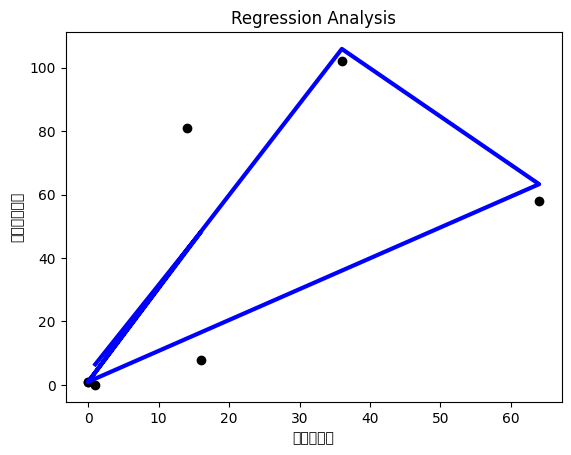

Feature Importance: [1.]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv("/content/머신러닝.csv")

# 독립변수와 종속변수 분리
X = data[['교육시설수']]  # 독립변수: 교육시설수
y = data['불법주정차수']    # 종속변수: 불법주정차수

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 머신러닝 모델 선택 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# 결과 시각화
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('교육시설수')
plt.ylabel('불법주정차수')
plt.title('Regression Analysis')
plt.show()

# 모델 해석
importances = model.feature_importances_
print('Feature Importance:', importances)


In [ ]:
cols = ['불법주정차수','교육시설수']

corr = data[cols].corr(method = 'pearson')
corr

,불법주정차수,교육시설수
불법주정차수,1.000000,0.805805
교육시설수,0.805805,1.000000


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

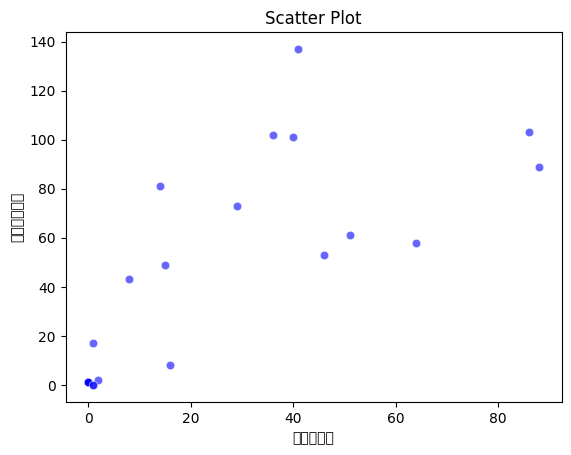

In [ ]:
import seaborn as sns
sns.scatterplot(data=data, x='교육시설수', y='불법주정차수', markers='o', color='blue', alpha=0.6)
plt.title('Scatter Plot')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# split dataset into training & test
X = merged_data['교육시설수']
y = merged_data['불법주정차수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train

28    41.0
19    51.0
14    88.0
24    36.0
10     0.0
20     0.0
26    86.0
4      1.0
2      0.0
25     0.0
6      0.0
13     0.0
7     29.0
29     0.0
1      0.0
16     8.0
0      0.0
15    14.0
31     1.0
30     1.0
9     16.0
8      0.0
12     0.0
11    40.0
5      0.0
Name: 교육시설수, dtype: float64

In [ ]:
import pandas as pd
df=pd.read_csv('/content/불법통합.csv',encoding='cp949')
df

,결과코드,우편번호,지번주소,도로명주소
0,전환성공,6035,강남구 신사동 515-8 / 도산대로11길 11,서울특별시 강남구 도산대로11길 11 (신사동)
1,전환성공,6035,강남구 신사동 536-6 과 515-8 사이,"서울특별시 강남구 강남대로152길 41, 과 515-8 사이 (신사동)"
2,전환성공,6123,강남구 역삼동 809-12 대로변 불법주차,"서울특별시 강남구 강남대로 452, 대로변 불법주차 (역삼동)"
3,전환성공,6129,강남구 역삼동 815-4 뒷길 주차장입구,"서울특별시 강남구 강남대로 428, 뒷길 주차장입구 (역삼동)"
4,전환성공,6193,강남구 대치동 890-45 이자카야나무 대치점(선릉로86길 37)주소지앞 이면도로 ...,"서울특별시 강남구 선릉로86길 37, 이자카야나무 대치점(선릉로86길 37)주소지앞..."
...,...,...,...,...
20873,전환성공,6205,강남구 대치동 924-6,서울특별시 강남구 도곡로63길 24 (대치동)
20874,전환성공,6206,강남구 대치동 936-11,서울특별시 강남구 선릉로64길 14 (대치동)
20875,전환성공,6199,강남구 대치동 920-8,서울특별시 강남구 선릉로72길 20 (대치동)
20876,전환성공,6142,강남구 역삼동 677-12,서울특별시 강남구 테헤란로33길 12 (역삼동)


In [ ]:
# '결과코드' 열에 형식 없음 행 삭제
df = df[df['결과코드'] != '형식오류']

# 삭제된 결과 확인
df


,결과코드,우편번호,지번주소,도로명주소
0,전환성공,6035,강남구 신사동 515-8 / 도산대로11길 11,서울특별시 강남구 도산대로11길 11 (신사동)
1,전환성공,6035,강남구 신사동 536-6 과 515-8 사이,"서울특별시 강남구 강남대로152길 41, 과 515-8 사이 (신사동)"
2,전환성공,6123,강남구 역삼동 809-12 대로변 불법주차,"서울특별시 강남구 강남대로 452, 대로변 불법주차 (역삼동)"
3,전환성공,6129,강남구 역삼동 815-4 뒷길 주차장입구,"서울특별시 강남구 강남대로 428, 뒷길 주차장입구 (역삼동)"
4,전환성공,6193,강남구 대치동 890-45 이자카야나무 대치점(선릉로86길 37)주소지앞 이면도로 ...,"서울특별시 강남구 선릉로86길 37, 이자카야나무 대치점(선릉로86길 37)주소지앞..."
...,...,...,...,...
20872,전환성공,6201,강남구 대치동 911-7/차량번호 3822/강남구 대치동 1011-25,"서울특별시 강남구 역삼로 448, /차량번호 3822/강남구 대치동 1011-25 ..."
20873,전환성공,6205,강남구 대치동 924-6,서울특별시 강남구 도곡로63길 24 (대치동)
20874,전환성공,6206,강남구 대치동 936-11,서울특별시 강남구 선릉로64길 14 (대치동)
20875,전환성공,6199,강남구 대치동 920-8,서울특별시 강남구 선릉로72길 20 (대치동)


In [ ]:
# '결과코드' 열 삭제
df.drop(columns=['결과코드'], inplace=True)
df

<ipython-input-76-06fa2d656fad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['결과코드'], inplace=True)


,우편번호,지번주소,도로명주소
0,6035,강남구 신사동 515-8 / 도산대로11길 11,서울특별시 강남구 도산대로11길 11 (신사동)
1,6035,강남구 신사동 536-6 과 515-8 사이,"서울특별시 강남구 강남대로152길 41, 과 515-8 사이 (신사동)"
2,6123,강남구 역삼동 809-12 대로변 불법주차,"서울특별시 강남구 강남대로 452, 대로변 불법주차 (역삼동)"
3,6129,강남구 역삼동 815-4 뒷길 주차장입구,"서울특별시 강남구 강남대로 428, 뒷길 주차장입구 (역삼동)"
4,6193,강남구 대치동 890-45 이자카야나무 대치점(선릉로86길 37)주소지앞 이면도로 ...,"서울특별시 강남구 선릉로86길 37, 이자카야나무 대치점(선릉로86길 37)주소지앞..."
...,...,...,...
20872,6201,강남구 대치동 911-7/차량번호 3822/강남구 대치동 1011-25,"서울특별시 강남구 역삼로 448, /차량번호 3822/강남구 대치동 1011-25 ..."
20873,6205,강남구 대치동 924-6,서울특별시 강남구 도곡로63길 24 (대치동)
20874,6206,강남구 대치동 936-11,서울특별시 강남구 선릉로64길 14 (대치동)
20875,6199,강남구 대치동 920-8,서울특별시 강남구 선릉로72길 20 (대치동)


In [ ]:
df1=pd.read_csv('/content/형식오류.csv')
df1

,지번주소,우편번호,도로명주소,Unnamed: 3,Unnamed: 4
0,강남구 대치동 893,6195.0,"서울특별시 강남구 삼성로85길 11 (대치동, 롯데캐슬아파트)",NaN,NaN
1,강남구 대치동 974,6191.0,"서울특별시 강남구 삼성로64길 5 (대치동, 대치현대아파트)",NaN,NaN
2,강남구 대치동 949,6182.0,서울특별시 강남구 영동대로75길 9 (대치동),NaN,NaN
3,강남구 대치동 949,6182.0,서울특별시 강남구 영동대로75길 9 (대치동),NaN,NaN
4,강남구 역삼동 677,6142.0,서울특별시 강남구 테헤란로33길 18 (역삼동),NaN,NaN
...,...,...,...,...,...
2215,강남구 대치동 78-29,6177.0,서울특별시 강남구 역삼로107길 20-28 (대치동),NaN,NaN
2216,NaN,NaN,NaN,NaN,NaN
2217,강남구 신사동662-4,6018.0,서울특별시 강남구 언주로172길 51 (신사동),NaN,NaN
2218,강남구 신사동662-4,6018.0,서울특별시 강남구 언주로172길 51 (신사동),NaN,NaN


In [ ]:
# 모든 값이 NaN인 열 삭제
df1 = df1.dropna(axis=1, how='all')
df1

,지번주소,우편번호,도로명주소
0,강남구 대치동 893,6195.0,"서울특별시 강남구 삼성로85길 11 (대치동, 롯데캐슬아파트)"
1,강남구 대치동 974,6191.0,"서울특별시 강남구 삼성로64길 5 (대치동, 대치현대아파트)"
2,강남구 대치동 949,6182.0,서울특별시 강남구 영동대로75길 9 (대치동)
3,강남구 대치동 949,6182.0,서울특별시 강남구 영동대로75길 9 (대치동)
4,강남구 역삼동 677,6142.0,서울특별시 강남구 테헤란로33길 18 (역삼동)
...,...,...,...
2215,강남구 대치동 78-29,6177.0,서울특별시 강남구 역삼로107길 20-28 (대치동)
2216,NaN,NaN,NaN
2217,강남구 신사동662-4,6018.0,서울특별시 강남구 언주로172길 51 (신사동)
2218,강남구 신사동662-4,6018.0,서울특별시 강남구 언주로172길 51 (신사동)


In [ ]:
# NaN 값을 가진 행 삭제
df1 = df1.dropna()
df1

,지번주소,우편번호,도로명주소
0,강남구 대치동 893,6195.0,"서울특별시 강남구 삼성로85길 11 (대치동, 롯데캐슬아파트)"
1,강남구 대치동 974,6191.0,"서울특별시 강남구 삼성로64길 5 (대치동, 대치현대아파트)"
2,강남구 대치동 949,6182.0,서울특별시 강남구 영동대로75길 9 (대치동)
3,강남구 대치동 949,6182.0,서울특별시 강남구 영동대로75길 9 (대치동)
4,강남구 역삼동 677,6142.0,서울특별시 강남구 테헤란로33길 18 (역삼동)
...,...,...,...
2214,강남구 신사동 626,6024.0,"서울특별시 강남구 도산대로35길 46 (신사동, 리갈팰리스)"
2215,강남구 대치동 78-29,6177.0,서울특별시 강남구 역삼로107길 20-28 (대치동)
2217,강남구 신사동662-4,6018.0,서울특별시 강남구 언주로172길 51 (신사동)
2218,강남구 신사동662-4,6018.0,서울특별시 강남구 언주로172길 51 (신사동)


In [ ]:
# 두 데이터프레임을 수직으로 병합
result = pd.concat([df, df1], ignore_index=True)
result

,우편번호,지번주소,도로명주소
0,6035.0,강남구 신사동 515-8 / 도산대로11길 11,서울특별시 강남구 도산대로11길 11 (신사동)
1,6035.0,강남구 신사동 536-6 과 515-8 사이,"서울특별시 강남구 강남대로152길 41, 과 515-8 사이 (신사동)"
2,6123.0,강남구 역삼동 809-12 대로변 불법주차,"서울특별시 강남구 강남대로 452, 대로변 불법주차 (역삼동)"
3,6129.0,강남구 역삼동 815-4 뒷길 주차장입구,"서울특별시 강남구 강남대로 428, 뒷길 주차장입구 (역삼동)"
4,6193.0,강남구 대치동 890-45 이자카야나무 대치점(선릉로86길 37)주소지앞 이면도로 ...,"서울특별시 강남구 선릉로86길 37, 이자카야나무 대치점(선릉로86길 37)주소지앞..."
...,...,...,...
20838,6024.0,강남구 신사동 626,"서울특별시 강남구 도산대로35길 46 (신사동, 리갈팰리스)"
20839,6177.0,강남구 대치동 78-29,서울특별시 강남구 역삼로107길 20-28 (대치동)
20840,6018.0,강남구 신사동662-4,서울특별시 강남구 언주로172길 51 (신사동)
20841,6018.0,강남구 신사동662-4,서울특별시 강남구 언주로172길 51 (신사동)


In [ ]:
result.to_csv('불법주정차도로명최종.csv', index=False)

In [ ]:
result.drop(columns=['우편번호'], inplace=True)
result.drop(columns=['지번주소'], inplace=True)
result

,도로명주소
0,서울특별시 강남구 도산대로11길 11 (신사동)
1,"서울특별시 강남구 강남대로152길 41, 과 515-8 사이 (신사동)"
2,"서울특별시 강남구 강남대로 452, 대로변 불법주차 (역삼동)"
3,"서울특별시 강남구 강남대로 428, 뒷길 주차장입구 (역삼동)"
4,"서울특별시 강남구 선릉로86길 37, 이자카야나무 대치점(선릉로86길 37)주소지앞..."
...,...
20838,"서울특별시 강남구 도산대로35길 46 (신사동, 리갈팰리스)"
20839,서울특별시 강남구 역삼로107길 20-28 (대치동)
20840,서울특별시 강남구 언주로172길 51 (신사동)
20841,서울특별시 강남구 언주로172길 51 (신사동)


In [ ]:
# NaN 값을 가진 행 삭제
result = result.dropna()
result

,도로명주소
0,서울특별시 강남구 도산대로11길 11 (신사동)
1,"서울특별시 강남구 강남대로152길 41, 과 515-8 사이 (신사동)"
2,"서울특별시 강남구 강남대로 452, 대로변 불법주차 (역삼동)"
3,"서울특별시 강남구 강남대로 428, 뒷길 주차장입구 (역삼동)"
4,"서울특별시 강남구 선릉로86길 37, 이자카야나무 대치점(선릉로86길 37)주소지앞..."
...,...
20838,"서울특별시 강남구 도산대로35길 46 (신사동, 리갈팰리스)"
20839,서울특별시 강남구 역삼로107길 20-28 (대치동)
20840,서울특별시 강남구 언주로172길 51 (신사동)
20841,서울특별시 강남구 언주로172길 51 (신사동)


In [ ]:
# 특정 단어가 포함된 도로명 추출 함수 정의
def extract_road_type(address):
    road_types = ['가로수길', '강남대로', '남부순환로', '논현로', '도곡로',
                  '도산대로', '봉은사로', '삼성로', '선릉로', '압구정로',
                  '양재천로', '언주로', '역삼로', '영동대로', '테헤란로']
    for road_type in road_types:
        if road_type in address:
            return road_type
    return '기타'

# 도로 유형 추출 및 카운팅
result['도로명주소_그룹'] = result['도로명주소'].apply(extract_road_type)
result= result.groupby('도로명주소_그룹').size().reset_index(name='불법주정차수')
result


<ipython-input-106-56eda49cfe64>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['도로명주소_그룹'] = result['도로명주소'].apply(extract_road_type)


,도로명주소_그룹,불법주정차수
0,가로수길,36
1,강남대로,1305
2,기타,50
3,남부순환로,138
4,논현로,2927
5,도곡로,575
6,도산대로,2011
7,봉은사로,990
8,삼성로,946
9,선릉로,2555


In [ ]:
result = result[result['도로명주소_그룹'] != '기타']

result

,도로명주소_그룹,불법주정차수
0,가로수길,36
1,강남대로,1305
3,남부순환로,138
4,논현로,2927
5,도곡로,575
6,도산대로,2011
7,봉은사로,990
8,삼성로,946
9,선릉로,2555
10,압구정로,2676


In [ ]:
df3=pd.read_csv('/content/교육시설갯수.csv')
df3

,도로명주소_그룹,갯수
0,가로수길,1
1,강남대로,29
2,개포로,1
3,남부순환로,16
4,논현로,40
5,도곡로,88
6,도산대로,14
7,봉은사로,8
8,삼성로,64
9,선릉로,51


In [ ]:
# '압구정로'의 값을 46에서 47로 변경
df3.loc[df3['도로명주소_그룹'] == '압구정로', '갯수'] = 47

# '압루정로'를 제거
df3 = df3[df3['도로명주소_그룹'] != '압루정로']
df3['교육시설수']= df3[['갯수']]

# 결과 출력
df3


<ipython-input-110-72a1aa0e754b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['교육시설수']= df3[['갯수']]


,도로명주소_그룹,갯수,교육시설수
0,가로수길,1,1
1,강남대로,29,29
2,개포로,1,1
3,남부순환로,16,16
4,논현로,40,40
5,도곡로,88,88
6,도산대로,14,14
7,봉은사로,8,8
8,삼성로,64,64
9,선릉로,51,51


In [ ]:
df3.drop(columns=['갯수'], inplace=True)
df3

<ipython-input-111-5b9287183d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns=['갯수'], inplace=True)


,도로명주소_그룹,교육시설수
0,가로수길,1
1,강남대로,29
2,개포로,1
3,남부순환로,16
4,논현로,40
5,도곡로,88
6,도산대로,14
7,봉은사로,8
8,삼성로,64
9,선릉로,51


In [ ]:
# 두 데이터프레임 가로로 합치기
merged_data = pd.merge(result, df3, on='도로명주소_그룹', suffixes=('_1', '_2'), how='outer')

# NaN 값을 0으로 대체
merged_data = merged_data.fillna(0)
merged_data

,도로명주소_그룹,불법주정차수,교육시설수
0,가로수길,36.0,1
1,강남대로,1305.0,29
2,남부순환로,138.0,16
3,논현로,2927.0,40
4,도곡로,575.0,88
5,도산대로,2011.0,14
6,봉은사로,990.0,8
7,삼성로,946.0,64
8,선릉로,2555.0,51
9,압구정로,2676.0,47


In [ ]:
df4=pd.read_csv('/content/식당_도로명.csv')
df4

,도로명주소_그룹,갯수
0,서울특별시 강남구 강남대로 310,1
1,서울특별시 강남구 강남대로 314,1
2,서울특별시 강남구 강남대로 390,3
3,서울특별시 강남구 강남대로 446,1
4,서울특별시 강남구 강남대로 620,1
...,...,...
288,서울특별시 강남구 테헤란로84,7
289,서울특별시 강남구 테헤란로86,1
290,서울특별시 강남구 테헤란로88,1
291,서울특별시 강남구 테헤란로92,1


In [ ]:
# 특정 키워드를 리스트로 지정
keywords = ['가로수길', '강남대로', '남부순환로', '논현로', '도곡로', '도산대로',
            '봉은사로', '삼성로', '선릉로', '압구정로', '양재천로', '언주로',
            '역삼로', '영동대로', '테헤란로','개포로']

# 도로명주소에 특정 키워드가 포함된 행들만 필터링
df4 = df4[df4['도로명주소_그룹'].str.contains('|'.join(keywords))]

# 도로명주소에서 특정 키워드 추출하여 새로운 열에 추가
df4['도로명주소_그룹'] = df4['도로명주소_그룹'].str.extract('({})'.format('|'.join(keywords)), expand=False)

# 특정 키워드를 기준으로 그룹화하여 갯수 계산
df4 = df4.groupby('도로명주소_그룹')['갯수'].sum().reset_index()
df4['음식점수']=df4[['갯수']]
df4.drop(columns=['갯수'], inplace=True)

# 결과 출력
df4

,도로명주소_그룹,음식점수
0,강남대로,86
1,남부순환로,3
2,논현로,82
3,도곡로,26
4,도산대로,23
5,봉은사로,23
6,삼성로,49
7,선릉로,50
8,압구정로,49
9,언주로,64


In [ ]:
# 두 데이터프레임 가로로 합치기
merged_data2 = pd.merge(merged_data, df4, on='도로명주소_그룹', suffixes=('_1', '_2'), how='outer')

# NaN 값을 0으로 대체
merged_data2 = merged_data2.fillna(0)
merged_data2

,도로명주소_그룹,불법주정차수,교육시설수,음식점수
0,가로수길,36.0,1,0.0
1,강남대로,1305.0,29,86.0
2,남부순환로,138.0,16,3.0
3,논현로,2927.0,40,82.0
4,도곡로,575.0,88,26.0
5,도산대로,2011.0,14,23.0
6,봉은사로,990.0,8,23.0
7,삼성로,946.0,64,49.0
8,선릉로,2555.0,51,50.0
9,압구정로,2676.0,47,49.0


In [ ]:
merged_data2.to_csv('불법주정차+교육시설+식당.csv', index=False)

In [ ]:
dr=pd.read_csv('/content/도로폭.csv',encoding='cp949')
dr

,순번,주소,도로종류,도로기능,도로규모,도로폭,중앙값
0,1,서울시 강남구 가락로,일반도로,국지도로,소로3류,폭6-8m,7.0
1,2,서울시 강남구 가락로11길,일반도로,국지도로,소로,6m미만,3.0
2,3,서울시 강남구 가락로12길,일반도로,국지도로,소로2류,폭8-10m,9.0
3,4,서울시 강남구 가락로13길,일반도로,국지도로,소로,6m미만,3.0
4,5,서울시 강남구 가락로15길,일반도로,국지도로,소로,6m미만,3.0
...,...,...,...,...,...,...,...
27770,28151,서울시 강남구 4.19로32길,일반도로,국지도로,소로,6m미만,3.0
27771,28152,서울시 강남구 4.19로8길,일반도로,국지도로,소로1류,폭10-12m,11.0
27772,28153,서울시 강남구 4.19로9가길,일반도로,국지도로,소로,6m미만,3.0
27773,28154,서울시 강남구 4.19로9길,일반도로,국지도로,소로3류,폭6-8m,7.0


In [ ]:

# 특정 키워드 리스트
keywords = ['가로수길', '강남대로', '남부순환로', '논현로', '도곡로', '도산대로',
            '봉은사로', '삼성로', '선릉로', '압구정로', '양재천로', '언주로',
            '역삼로', '영동대로', '테헤란로','개포로']

# 주소에 특정 키워드가 포함된 행만 필터링
dr = dr[dr['주소'].str.contains('|'.join(keywords))]

# 특정 키워드를 추출하여 새로운 열에 추가
dr['도로명주소_그룹'] = dr['주소'].str.extract('({})'.format('|'.join(keywords)), expand=False)

# 특정 키워드를 기준으로 그룹화하여 중앙값의 평균 계산
dr = dr.groupby('도로명주소_그룹')['중앙값'].mean().reset_index()

dr['도로폭_평균']=dr[['중앙값']]
dr.drop(columns=['중앙값'], inplace=True)
# 결과 출력
dr

<ipython-input-151-923b1fcfd48b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dr['도로명주소_그룹'] = dr['주소'].str.extract('({})'.format('|'.join(keywords)), expand=False)


,도로명주소_그룹,도로폭_평균
0,가로수길,9.000000
1,강남대로,5.341772
2,개포로,9.322581
3,남부순환로,5.007605
4,논현로,6.121739
5,도곡로,8.388889
6,도산대로,4.864407
7,봉은사로,5.617188
8,삼성로,6.915094
9,선릉로,5.942029


In [ ]:
# 두 데이터프레임 가로로 합치기
merged_data3 = pd.merge(merged_data2, dr, on='도로명주소_그룹', suffixes=('_1', '_2'), how='outer')

# NaN 값을 0으로 대체
merged_data3 = merged_data3.fillna(0)
merged_data3

,도로명주소_그룹,불법주정차수,교육시설수,음식점수,도로폭_평균
0,가로수길,36.0,1,0.0,9.000000
1,강남대로,1305.0,29,86.0,5.341772
2,남부순환로,138.0,16,3.0,5.007605
3,논현로,2927.0,40,82.0,6.121739
4,도곡로,575.0,88,26.0,8.388889
5,도산대로,2011.0,14,23.0,4.864407
6,봉은사로,990.0,8,23.0,5.617188
7,삼성로,946.0,64,49.0,6.915094
8,선릉로,2555.0,51,50.0,5.942029
9,압구정로,2676.0,47,49.0,7.628571


In [ ]:
merged_data3.to_csv('불법주정차+교육시설+식당+도로폭.csv', index=False)

In [ ]:
hw=pd.read_csv('/content/신호등보행자최종 (1).csv',encoding='cp949')
hw

,입력주소,도로명
0,서울특별시 강남구 대치동 973-12 대,삼성로 68길
1,서울특별시 강남구 대치동 973-12 대,삼성로 69길
2,서울특별시 강남구 역삼동 712 공,서울륵별시 강남구 테헤란로 44길
3,서울특별시 강남구 역삼동 633-16 대,서울특별시 강남구 테헤란로13길 35 (역삼동)
4,서울특별시 강남구 대치동 137 공,서울 강남구 선릉로86길 31
...,...,...
736,서울특별시 강남구 역삼동 858 도,서울특별시 강남구 강남대로 382-2 (역삼동)
737,서울특별시 강남구 역삼동 858 도,서울특별시 강남구 강남대로 384-2 (역삼동)
738,서울특별시 강남구 역삼동 858 도,서울특별시 강남구 강남대로 326-2 (역삼동)
739,서울특별시 강남구 역삼동 858 도,서울특별시 강남구 강남대로 346-2 (역삼동)


In [ ]:
hw.drop(columns=['입력주소'], inplace=True)
hw

,도로명
0,삼성로 68길
1,삼성로 69길
2,서울륵별시 강남구 테헤란로 44길
3,서울특별시 강남구 테헤란로13길 35 (역삼동)
4,서울 강남구 선릉로86길 31
...,...
736,서울특별시 강남구 강남대로 382-2 (역삼동)
737,서울특별시 강남구 강남대로 384-2 (역삼동)
738,서울특별시 강남구 강남대로 326-2 (역삼동)
739,서울특별시 강남구 강남대로 346-2 (역삼동)


In [ ]:
# 특정 단어 리스트
road_types = ['가로수길', '강남대로', '남부순환로', '논현로', '도곡로',
              '도산대로', '봉은사로', '삼성로', '선릉로', '압구정로',
              '양재천로', '언주로', '역삼로', '영동대로', '테헤란로']

# 도로명주소에 특정 단어가 포함되어 있는지 확인하여 그룹화
def extract_road_type(address):
    for road_type in road_types:
        if road_type in address:
            return road_type
    return '기타'

# 도로명주소에서 도로 유형 추출
hw['도로명주소_그룹'] = hw['도로명'].apply(extract_road_type)

# 그룹화 및 갯수 계산
hw = hw.groupby('도로명주소_그룹').size().reset_index(name='횡단보도수')

# 결과 출력
hw

,도로명주소_그룹,횡단보도수
0,강남대로,62
1,기타,3
2,남부순환로,10
3,논현로,38
4,도곡로,22
5,도산대로,22
6,봉은사로,65
7,삼성로,88
8,선릉로,27
9,압구정로,16


In [ ]:
hw = hw[hw['도로명주소_그룹'] != '기타']


In [ ]:
hw

,도로명주소_그룹,횡단보도수
0,강남대로,62
2,남부순환로,10
3,논현로,38
4,도곡로,22
5,도산대로,22
6,봉은사로,65
7,삼성로,88
8,선릉로,27
9,압구정로,16
10,언주로,51


In [ ]:
# 두 데이터프레임 가로로 합치기
merged_data4 = pd.merge(merged_data3, hw, on='도로명주소_그룹', suffixes=('_1', '_2'), how='outer')

# NaN 값을 0으로 대체
merged_data4 = merged_data4.fillna(0)
merged_data4

,도로명주소_그룹,불법주정차수,교육시설수,음식점수,도로폭_평균,횡단보도수
0,가로수길,36.0,1,0.0,9.000000,0.0
1,강남대로,1305.0,29,86.0,5.341772,62.0
2,남부순환로,138.0,16,3.0,5.007605,10.0
3,논현로,2927.0,40,82.0,6.121739,38.0
4,도곡로,575.0,88,26.0,8.388889,22.0
5,도산대로,2011.0,14,23.0,4.864407,22.0
6,봉은사로,990.0,8,23.0,5.617188,65.0
7,삼성로,946.0,64,49.0,6.915094,88.0
8,선릉로,2555.0,51,50.0,5.942029,27.0
9,압구정로,2676.0,47,49.0,7.628571,16.0


In [ ]:
merged_data4.to_csv('불법주정차+교육시설+식당+도로폭+횡단보도수.csv', index=False)

In [ ]:
import pandas as pd
merged_data3=pd.read_csv('/content/불법주정차+교육시설+식당+도로폭.csv')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,587 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [ ]:
cols = ['불법주정차수','교육시설수','음식점수','도로폭_평균']

corr = merged_data3[cols].corr(method = 'pearson')
corr

,불법주정차수,교육시설수,음식점수,도로폭_평균
불법주정차수,1.000000,0.335166,0.798671,-0.221467
교육시설수,0.335166,1.000000,0.469836,-0.059038
음식점수,0.798671,0.469836,1.000000,-0.201863
도로폭_평균,-0.221467,-0.059038,-0.201863,1.000000


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

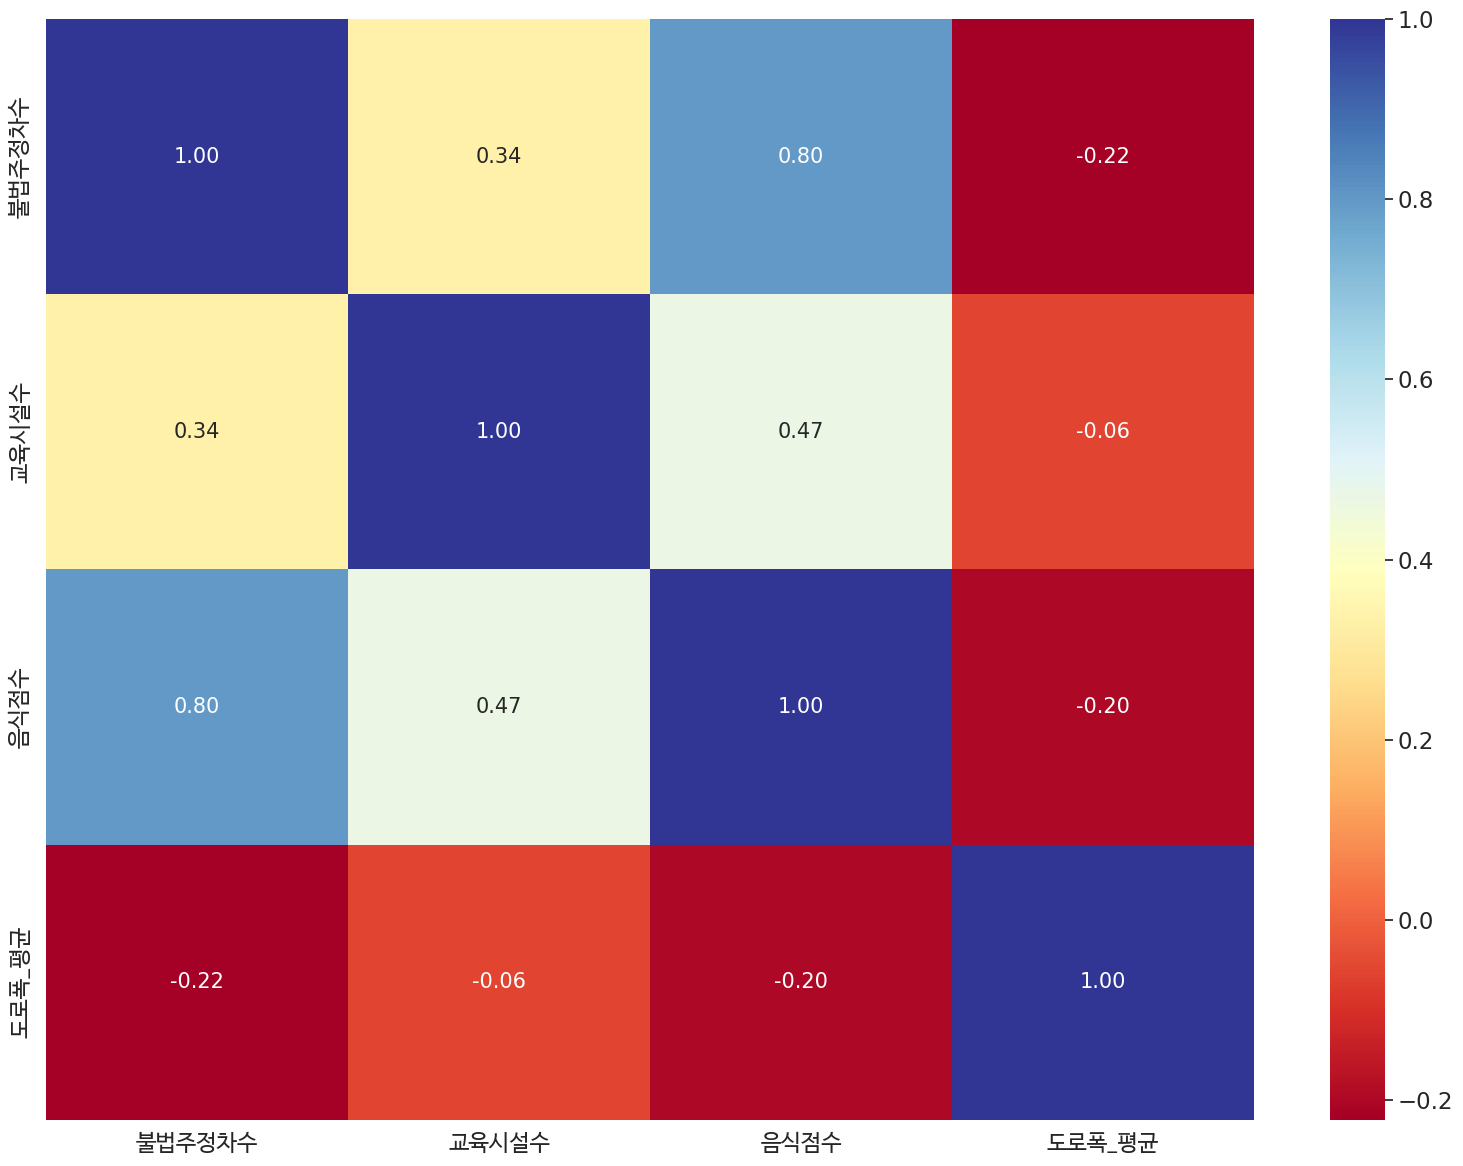

In [ ]:

### 사용할 라이브러리
import pandas as pd ### 데이터 분석을 하기 위한 파이썬 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize = (16, 12))
ax = fig.gca()

sns.set(font_scale = 1.5)  # heatmap 안의 font-size 설정
heatmap = sns.heatmap(corr.values, annot = True, fmt='.2f', annot_kws={'size':15},
                      yticklabels = cols, xticklabels = cols, ax=ax, cmap = "RdYlBu")
plt.tight_layout() ## 여백을 조정합니다.
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
#
plt.show()